In [1]:
from animate import anim 
import numpy as np
import torch 
from model import PINNs
from deepxrte.geometry import Rectangle
import pandas as pd
from utils import charge_data
import json
from deepxrte.geometry import RectangleWithoutCylinder

In [2]:
hyper_param={
    "nb_points_axes": 6,  # le nombre de points pris par axe par pas de temps
    "x_min": -0.05,
    "x_max": 0.2,
    "y_min": -0.06,
    "y_max": 0.06,
    "t_min": 6.5,
    "t_max": 8,
}
param_adim = {
    'L': 0.025,
    'V': 2., 
    'rho': 1.2
}

In [3]:
param_adim = {
    'L': 0.025,
    'V': 2., 
    'rho': 1.2
}

In [4]:
X_train, U_train, X_full, U_full, X_border, mean_std = charge_data(hyper_param, param_adim)

In [15]:
np.unique(X_border[:,2]).shape

(123,)

In [16]:
import matplotlib.pyplot as plt

In [17]:
x = ((X_border[:, 0]*mean_std['x_std'] + mean_std['x_mean']))*param_adim['L']

In [18]:
y = ((X_border[:, 1]*mean_std['y_std'] + mean_std['y_mean']))*param_adim['L']

(-0.013743392118779304,
 0.013749685338989492,
 -0.013748269255515783,
 0.013748269255515783)

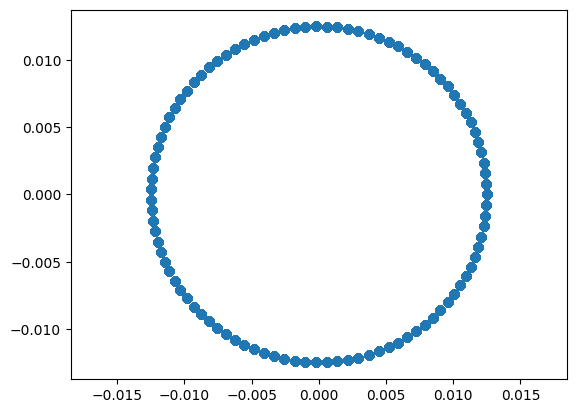

In [19]:
plt.scatter(x, y)
plt.axis('equal')

In [20]:
x = ((X_train[:, 0]*mean_std['x_std'] + mean_std['x_mean']))*param_adim['L']
y = ((X_train[:, 1]*mean_std['y_std'] + mean_std['y_mean']))*param_adim['L']

(-0.062003445000000004, 0.21195254500000002, -0.06591645500000001, 0.065624955)

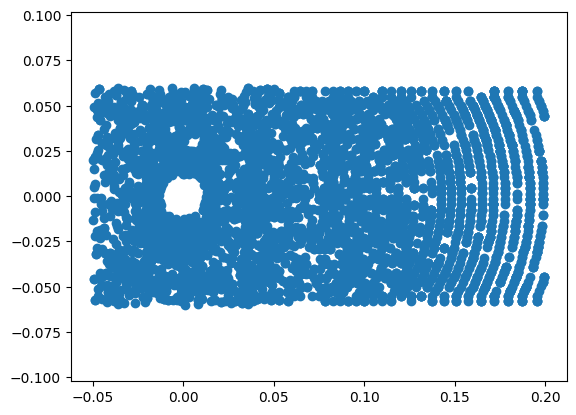

In [21]:
plt.scatter(x, y)
plt.axis('equal')

In [22]:
rectangle = RectangleWithoutCylinder(
            x_max=X_full[:, 0].max(),
            y_max=X_full[:, 1].max(),
            t_min=X_full[:, 2].min(),
            t_max=X_full[:, 2].max(),
            x_min=X_full[:, 0].min(),
            y_min=X_full[:, 1].min(),
            x_cyl=0.0,
            y_cyl=0.0,
            r_cyl=0.025/2, 
            mean_std = mean_std,
            param_adim=param_adim
        )

In [23]:
piche = rectangle.generate_lhs(10000)

In [26]:
x = ((piche[:, 0]*mean_std['x_std'] + mean_std['x_mean']))*param_adim['L']
y = ((piche[:, 1]*mean_std['y_std'] + mean_std['y_mean']))*param_adim['L']

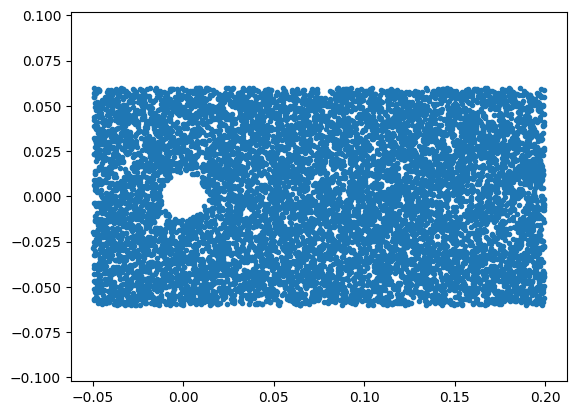

In [28]:
with torch.no_grad():
    plt.scatter(x, y, marker='.')
    plt.axis('equal')

In [13]:
from pyDOE import lhs

In [14]:
x_max = 5
x_min = -2
y_max = 7
y_min = 3
t_min = 0
t_max = 65
x_cyl=0.0
y_cyl=4
r_cyl=1


def generate_lhs(n):
        """Donne répartition latin hypercube"""
        max_min = torch.tensor(
            [x_max - x_min, y_max -
                y_min, t_max - t_min]
        )
        minn = torch.tensor([x_min, y_min, t_min])
        tensor_final = torch.zeros((0, 3))
        while tensor_final.shape[0] < n:
            n_left = n - tensor_final.shape[0]
            test = minn + max_min * torch.from_numpy(lhs(3, n_left))
            test_good = test[((test[:,0]-x_cyl)**2 +( test[:, 1]-y_cyl)**2)> r_cyl**2]
            tensor_final = torch.concatenate((tensor_final, test_good))
            print(tensor_final.shape[0])
        return tensor_final
        #return tensor_final.to(dtype=torch.float32).requires_grad_()

In [15]:
piche = generate_lhs(10000)

8872
9886
9986
9999
9999
10000


(-2.349449413495678, 5.349594182485253, 2.8002260090570807, 7.1999127693750085)

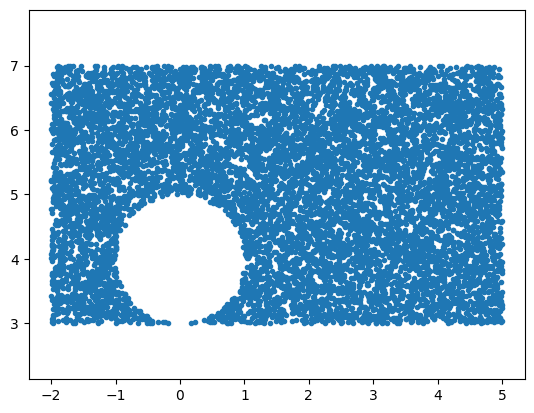

In [16]:
plt.scatter(piche[:,0], piche[:,1], marker='.')
plt.axis('equal')

In [17]:
piche = torch.zeros((0,3))

In [18]:
max_min = torch.tensor(
            [x_max - x_min, y_max -
                y_min, t_max - t_min]
        )
minn = torch.tensor([x_min, y_min, t_min])

In [19]:
test = minn + max_min * torch.from_numpy(lhs(3, 4))

In [20]:
piche = torch.concatenate((piche, test))

In [21]:
piche

tensor([[ 2.7756,  6.8105,  9.0971],
        [-1.2205,  3.2195, 54.9715],
        [ 0.2024,  4.0553, 42.3430],
        [ 4.8926,  5.4336, 18.4104]], dtype=torch.float64)